In [1]:
import pandas as pd
import numpy as np
import scipy 
from scipy.stats import pearsonr as pr
import seaborn as sns
from sklearn.linear_model import LogisticRegression as lr
import matplotlib.pyplot as plt
%pylab inline
titanic_df = pd.read_csv('titanic_data.csv')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def correlation(x,y):
    
    corr, p=pr(x,y)
    if p>0.05:
        test='The correlation is not statistically significant'
    elif p<=0.05:
        test='The correlation is statistically significant'
    
    return 'correlation: {:.4f}  P-value: {:.4f}%'.format(corr,p*100), test


In [3]:
def Survived_name(df):
    df.loc[df['Survived']==0,'Survived']='Dead'
    df.loc[df['Survived']==1,'Survived']='Alive'
    

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Question: What factors made people more likely to survive?

Prediction: I think Sex and Age are the biggest factors to survive, since concept of “women and children first”; I think class is the neext important factors. Normally higher class means the room is higher from the sea level, which let they have more time to escape.

In [5]:
print 'Number of NAN value in Cabin: ', titanic_df['Cabin'].isnull().values.sum()
print 'Number of data', len(titanic_df)


Number of NAN value in Cabin:  687
Number of data 891


we are droping the columns that we do not want 

PassengerId: we already have a index colmun 

Cabin: it has too many NAN value

Ticket: it does not show any similarity with each other 

In [6]:
titanic_df=titanic_df.drop(['PassengerId','Cabin','Ticket',],axis=1)
titanic_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,30.0708,C


In [7]:
#check Age for nan
print "Number of Missing data in Age: ", titanic_df['Age'].isnull().values.sum()

Number of Missing data in Age:  177


In [8]:
#Age fill nan
age_df=pd.DataFrame(titanic_df['Age'].fillna(titanic_df['Age'].mean()))

age2_df=pd.DataFrame(titanic_df['Age'].fillna(-1))

age3_df=pd.DataFrame(titanic_df['Survived'])
age3_df=age3_df.join(titanic_df['Age'])
age3_df =age3_df[np.isfinite(age3_df['Age'])]

print 'age NAN fill with mean:',correlation(age_df['Age'],titanic_df['Survived'])
print 'age NAN fill with -1:',correlation(age2_df['Age'],titanic_df['Survived'])
print 'age without NAN: ', correlation(age3_df['Age'],age3_df['Survived'])

age NAN fill with mean: ('correlation: -0.0698  P-value: 3.7217%', 'The correlation is statistically significant')
age NAN fill with -1: ('correlation: 0.0124  P-value: 71.0791%', 'The correlation is not statistically significant')
age without NAN:  ('correlation: -0.0772  P-value: 3.9125%', 'The correlation is statistically significant')


In [9]:
#age divid into group
children_df = titanic_df[['Survived','Age']][(titanic_df['Age'] <= 18)&(titanic_df['Age'] >2)]
adult_df= titanic_df[(titanic_df['Age'] > 18)]
baby_df=titanic_df[(titanic_df['Age']<=2)]
print 'baby: ', correlation(baby_df['Survived'],baby_df['Age'])
print 'children: ', correlation(children_df['Survived'],children_df['Age'])
print 'Adult: ', correlation(adult_df['Survived'],adult_df['Age'])

baby:  ('correlation: -0.5922  P-value: 0.2296%', 'The correlation is statistically significant')
children:  ('correlation: -0.2308  P-value: 1.3071%', 'The correlation is statistically significant')
Adult:  ('correlation: 0.0099  P-value: 81.2531%', 'The correlation is not statistically significant')


In [10]:
children_df=children_df[['Survived','Age']]
children_alive_df=children_df[(children_df['Survived']==1)]
children_dead_df=children_df[(children_df['Survived']==0)]
adult_df=adult_df[['Survived','Age']]
adult_alive_df=adult_df[(adult_df['Survived']==1)]
adult_dead_df=adult_df[(adult_df['Survived']==0)]
baby_df=baby_df[['Survived','Age']]
baby_alive_df=baby_df[(baby_df['Survived']==1)]
baby_dead_df=baby_df[(baby_df['Survived']==0)]

In [11]:
def graph_set(axis):
    axis.set_xlabel("Age")
    axis.set_ylabel("number")
    axis.legend(['Alive','Dead'],loc='upper center')

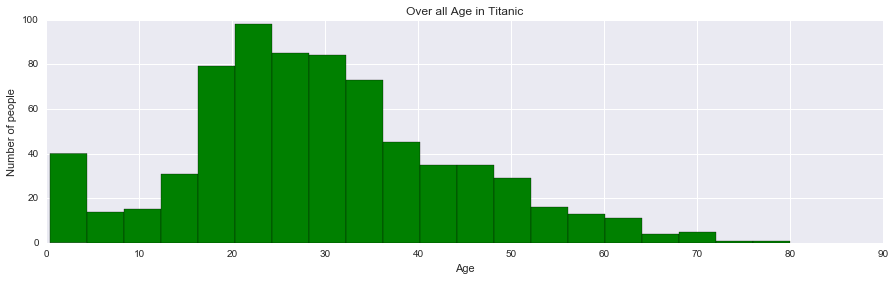

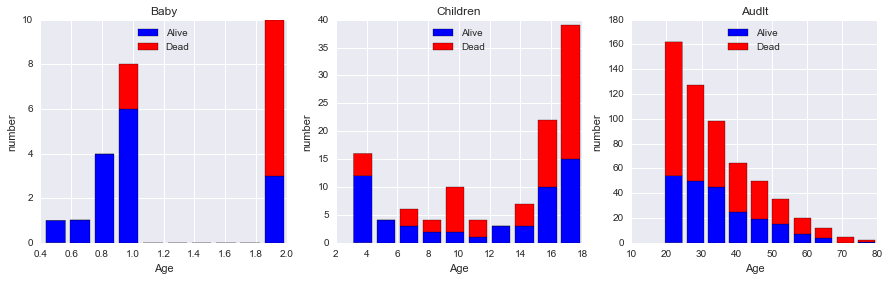

In [12]:
#age'graph
All_age=titanic_df['Age'].plot(kind='hist', title='Over all Age in Titanic', figsize=(15,4), bins=20, color='Green')
All_age.set_xlabel('Age')
All_age.set_ylabel('Number of people')
fig, ((axis1, axis2, axis3)) = plt.subplots(1,3,figsize=(15,4))
axis1.set_title('Baby')
axis2.set_title('Children')
axis3.set_title('Audlt')
axis1.hist([baby_alive_df['Age'],baby_dead_df['Age']],color=['blue','red'], stacked=True, bins=10)
axis2.hist([children_alive_df['Age'],children_dead_df['Age']],color=['blue','red'],stacked=True,bins=10)
axis3.hist([adult_alive_df['Age'],adult_dead_df['Age']],color=['blue','red'], stacked=True,bins=10)
graph_set(axis1)
graph_set(axis2)
graph_set(axis3)


### Analysis Age ###

>We can see we have some missing data in Age's column, so I am try to see which way is the best approach to eliminate the missing data. Base on the correlation test, I choose not to count the missing data at all. We can see three different approach all have small correlation with survival. It is really different from our prediction. 

>We think the children may have higher survival rate, so we use 2 years old and 18 years old  as divider to divide the age into three group: baby, children & adult. We can see baby group has the highest correlation (-0.59) & children group's correlation also increase to (-0.23). Since the correlation is negative, we may conclude that the younger passenger have higher chance to survive, but it only true for children. 

>For adult, age did not have relation to the survival rate. The correlation for adult 0.0099 and p-value is 81%, higher than 5%, which mean the correlation is not statistically significant. That means adult and survival do not have correlation.

In [13]:
#Sex
sex_df=titanic_df[['Survived','Sex']]
sex_df.loc[sex_df['Sex']=='male','Sex']=0
sex_df.loc[sex_df['Sex']=='female','Sex']=1
print "Sex's correlation: ",correlation(sex_df['Sex'],sex_df['Survived'])
female_male_df=pd.get_dummies(titanic_df['Sex'])
female_male_df=female_male_df.join(sex_df['Survived'])
Survived_name(female_male_df)
sex_sum_df=female_male_df.groupby(['Survived']).sum()
sex_count_df=titanic_df[['Survived','Sex']].groupby(['Sex']).count()
display(sex_count_df) 
display(sex_sum_df)





Sex's correlation:  ('correlation: 0.5434  P-value: 0.0000%', 'The correlation is statistically significant')


C:\Anaconda2\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Survived
Sex,
female,314
male,577


,female,male
Survived,,
Alive,233,109
Dead,81,468


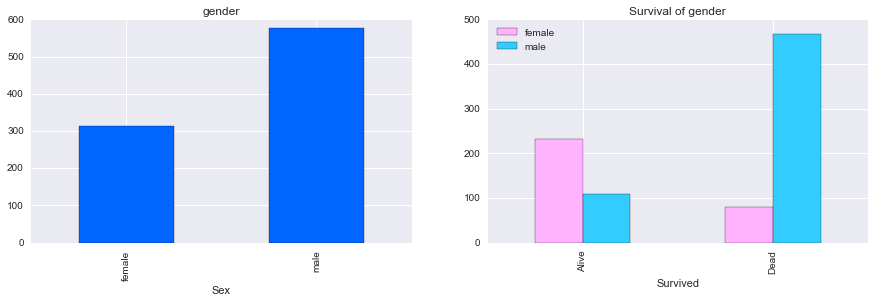

In [14]:
#sex's graph
fig, ((axis1, axis2)) = plt.subplots(1,2,figsize=(15,4))
sex_count_df.plot(kind='bar', title='gender',color='#0066FF', legend=False, ax=axis1)
sex_sum_df.plot(kind='bar', title='Survival of gender',color=['#FFB3FF','#33CCFF'],ax=axis2)


### Analysis Sex ###
>We can see number of male is almost double of female. But when we look at the number base on Survival, Female has more 2:1 Survival rate and Male's Survival rate only have 1:4.5. we can conclude being female can increase the chance to survival by a lot.

> The correlation is 0.54, which is high. And the p-value is less than 5%, it shows the correlation Sex and Survival is statistically significant

In [15]:
#family
family_df=pd.DataFrame(titanic_df['Survived'])
family_df['family']=titanic_df['SibSp']+titanic_df['Parch']
family_df.loc[family_df['family']>1,'family']=1
print "family's correlation: ", correlation(family_df['family'],family_df['Survived'])
is_family_df=pd.get_dummies(family_df['family'])
family_df.loc[family_df['family']==0,'family']='Alone'
family_df.loc[family_df['family']==1,'family']='with Family'
family_count_df=family_df.groupby(['family']).count()

family_df=family_df.join(is_family_df)
del family_df['family']
Survived_name(family_df)

family_sum_df=family_df.groupby('Survived').sum()
family_sum_df.columns=['Alone','With Family']



family's correlation:  ('correlation: 0.2034  P-value: 0.0000%', 'The correlation is statistically significant')


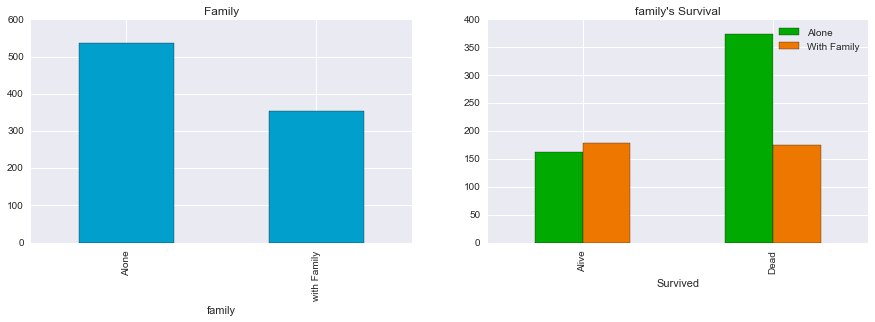

In [16]:
#family's graph
fig, ((axis1, axis2)) = plt.subplots(1,2,figsize=(15,4))
family_count_df.plot(kind='bar', title='Family',color='#009FCC', legend=False, ax=axis1)
family_sum_df.plot(kind='bar', title="family's Survival",color=['#00AA00','#EE7700'],ax=axis2)

### Analysis family ###

>I add the column SibSp and Parch together, if the value is not zero, I consider that passenger is on board with family member. We can see from the second graph, amount of passenger alive is similar but the amount of dead is very different. Passenger with other family member have survival rate 1:1; passenger who is alone has survival rate less than 1:2.5. The correlation test is 0.20, which show the correlation between survival and passenger with or without family is moderate. People may have higher chance to survive if they have other family member with them.

In [17]:
#class
class_df=pd.concat([titanic_df['Survived'],pd.get_dummies(titanic_df['Pclass'])],axis=1)
class_df.columns=['Survived','1st class','2nd class','3rd class']
print "class's correlation: ", correlation(titanic_df['Pclass'],titanic_df['Survived'])
Survived_name(class_df)
class_count_df=titanic_df[['Survived','Pclass']].groupby('Pclass').count()
class_sum_df=class_df.groupby('Survived').sum()
display(class_count_df)
display(class_sum_df)

class's correlation:  ('correlation: -0.3385  P-value: 0.0000%', 'The correlation is statistically significant')


,Survived
Pclass,
1,216
2,184
3,491


,1st class,2nd class,3rd class
Survived,,,
Alive,136,87,119
Dead,80,97,372


In [18]:
class2_df=titanic_df[['Survived','Pclass']]
class_sum = class2_df.groupby(['Survived', 'Pclass']).agg({'Pclass': 'sum'})
class_total = class2_df.groupby(['Pclass']).agg({'Pclass': 'sum'})
class_sum.div(class_total, level='Pclass') * 100


Pclass
Survived Pclass           
0        1       37.037037
         2       52.717391
         3       75.763747
1        1       62.962963
         2       47.282609
         3       24.236253

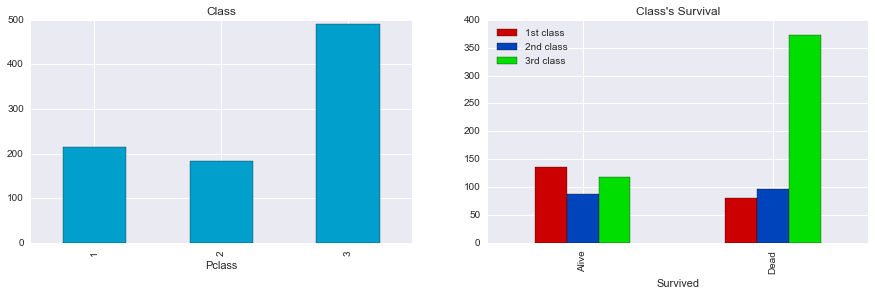

In [19]:
#class
fig, ((axis1, axis2)) = plt.subplots(1,2,figsize=(15,4))
class_count_df.plot(kind='bar', title='Class',color='#009FCC', legend=False, ax=axis1)
class_sum_df.plot(kind='bar', title="Class's Survival",color=['#CC0000','#0044BB','#00DD00'],ax=axis2)

### Analysis class ###

>I break down the class column into three class to see survival in each class. We can see 1st class has 63% survival rate; 2nd class has similar amount, 52% dead and 47% alive; 3rd class has more then 3 times dead  than alive, 75% of 3rd class is dead and 25% of 3rd alive.

>The correlation test show -0.33. The correlation between class and survival is moderate. And the P-value of the correlation is less than 5%. It shows the correlation is statistically significant. I think people who do not choose 3rd class can double their chance to survive from 25% to around 50% or more.

In [20]:
#Fare
fare_df=titanic_df[['Survived','Fare']]
print "Fare # of Missing date: ", fare_df['Fare'].isnull().values.sum()
print "class's correlation: ", correlation(titanic_df['Fare'],titanic_df['Survived'])
fare_dead=fare_df[fare_df['Survived']==0]
fare_alive=fare_df[fare_df['Survived']==1]

Fare # of Missing date:  0
class's correlation:  ('correlation: 0.2573  P-value: 0.0000%', 'The correlation is statistically significant')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,"Ward, Miss. Anna",female,35,0,0,512.3292,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,512.3292,C
737,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,512.3292,C


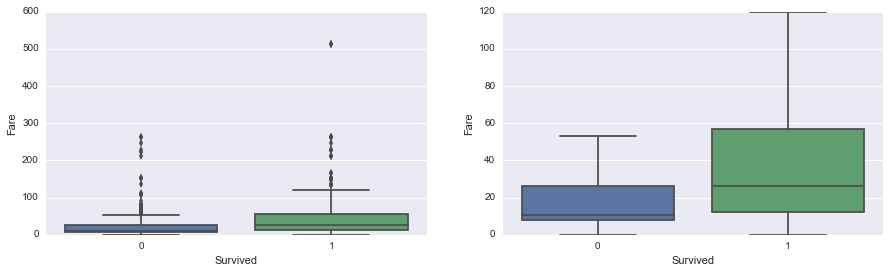

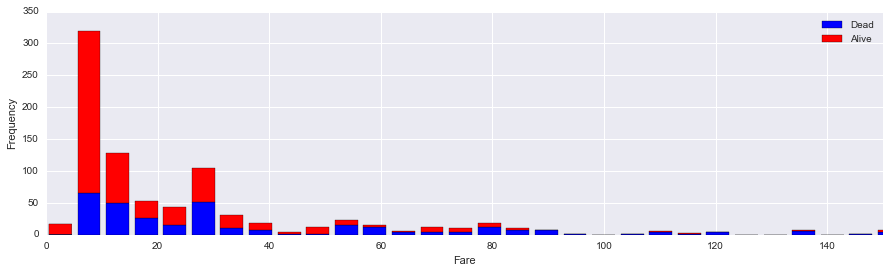

In [21]:
#Fare's graph

fig, ((axis1, axis2)) = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(y='Fare',x='Survived',data=fare_df,showfliers=True,ax=axis1)
sns.boxplot(y='Fare',x='Survived',data=fare_df,showfliers=False,ax=axis2)

fig,axis3= plt.subplots(1,1,figsize=(15,4))
axis3.hist([fare_alive['Fare'],fare_dead['Fare']],color=['blue','red'], stacked=True,bins=100,)
axis3.set_xlabel('Fare')
axis3.set_ylabel('Frequency')
axis3.legend(['Dead','Alive'])
axis3.set_xlim(0,150)
titanic_df[titanic_df['Fare']>500]

### Analysis fare ###

>I think fare and class will have the similar result, since the higher class ticket cost more.  From the first graph we can see some outlier. We can look closer to the outlier, we can find there have few people that pay more than \$500, and they all alive. But people pay around \$100~300 seem to have equal number between dead or live. Next we try to look closer to the boxplot without outlier. It shows people who dead is pay less compare to people who survive. We can see that bar graph for more detail. People who pay between \$0~20 are most likely dead. It matches with our class data. People who pay \$0~20 probably is paying for 3rd class ticket. The correlation test is 0.26, which is moderate.  Seem like the survival correlation for cost for the ticket is less class. Unless you pay more than \$500, which tickets have 100%  survival rate.

In [22]:
#Embarked
Embarked_df=pd.concat([titanic_df['Survived'],pd.get_dummies(titanic_df['Embarked'])],axis=1)

print "C's correlation: ", correlation(Embarked_df['C'],Embarked_df['Survived'])
print "Q's correlation: ", correlation(Embarked_df['Q'],Embarked_df['Survived'])
print "S's correlation: ", correlation(Embarked_df['S'],Embarked_df['Survived'])
Survived_name(Embarked_df)
embarked_count_df=titanic_df[['Survived','Embarked']].groupby('Embarked').count()
embarked_sum_df=Embarked_df.groupby('Survived').sum()
display(embarked_count_df)
display(embarked_sum_df)

C's correlation:  ('correlation: 0.1682  P-value: 0.0000%', 'The correlation is statistically significant')
Q's correlation:  ('correlation: 0.0037  P-value: 91.3353%', 'The correlation is not statistically significant')
S's correlation:  ('correlation: -0.1557  P-value: 0.0003%', 'The correlation is statistically significant')


,Survived
Embarked,
C,168
Q,77
S,644


,C,Q,S
Survived,,,
Alive,93,30,217
Dead,75,47,427


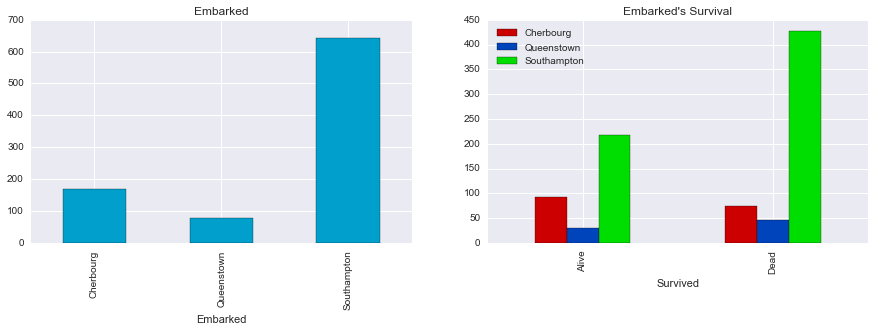

In [23]:
#Embarked'graph
fig, ((axis1, axis2)) = plt.subplots(1,2,figsize=(15,4))
embarked_count_df.plot(kind='bar', title='Embarked',color='#009FCC', legend=False, ax=axis1)
embarked_sum_df.plot(kind='bar', title="Embarked's Survival",color=['#CC0000','#0044BB','#00DD00'],ax=axis2)
axis1.set_xticklabels(['Cherbourg','Queenstown', 'Southampton'])
axis2.legend(['Cherbourg','Queenstown', 'Southampton'],loc='upper left')

### Analysis embarked ###
>I break down to three location. Southampton has the most people embarks and also the most people dead. And the correlation for all three location are less than 0.2, which mean the correlation is weak. Specially, for Queenstown 's correlation too small and p-value show that the correlation is not statistically significant.

After we check with each factor using correlation test, we can choose to factor we think is important to do a logistic regression.

In [24]:
titanic_clear_df=pd.DataFrame(titanic_df['Survived'])

In [25]:
#age
age_df=pd.DataFrame(titanic_df['Age'].fillna(titanic_df['Age'].mean()))
titanic_clear_df=titanic_clear_df.join(age_df)
#sex
sex_titanic=pd.get_dummies(titanic_df['Sex'])
titanic_clear_df=titanic_clear_df.join(sex_titanic)
#class
class_titanic=pd.get_dummies(titanic_df['Pclass'])
class_titanic.columns=['1st class','2nd class','3rd class']
titanic_clear_df=titanic_clear_df.join(class_titanic)
#family
titanic_clear_df['family']=titanic_df['SibSp']+titanic_df['Parch']
titanic_clear_df.loc[titanic_clear_df['family']>1,'family']=1
#Fare
Fare_df=pd.DataFrame(titanic_df['Fare'].fillna(titanic_df['Fare'].mean()))
titanic_clear_df=titanic_clear_df.join(titanic_df['Fare'])


In [26]:
titanic_clear_df.head(10)

,Survived,Age,female,male,1st class,2nd class,3rd class,family,Fare
0,0,22.000000,0,1,0,0,1,1,7.2500
1,1,38.000000,1,0,1,0,0,1,71.2833
2,1,26.000000,1,0,0,0,1,0,7.9250
3,1,35.000000,1,0,1,0,0,1,53.1000
4,0,35.000000,0,1,0,0,1,0,8.0500
5,0,29.699118,0,1,0,0,1,0,8.4583
6,0,54.000000,0,1,1,0,0,0,51.8625
7,0,2.000000,0,1,0,0,1,1,21.0750
8,1,27.000000,1,0,0,0,1,1,11.1333
9,1,14.000000,1,0,0,1,0,1,30.0708


In [27]:
titanic_fin_df=pd.DataFrame(titanic_clear_df.drop(['Survived'],axis=1))
Survived_df=pd.DataFrame(titanic_df["Survived"])


In [28]:
clf=lr()
clf.fit(titanic_fin_df,Survived_df)
clf.score(titanic_fin_df,Survived_df)

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.79461279461279466

In [29]:
coeff_df = pd.DataFrame(titanic_fin_df.columns)
coeff_df.columns = ['Factor']
coeff_df["Correlation Coefficient"] = pd.Series(clf.coef_[0])
coeff_df.sort_values(by='Correlation Coefficient',ascending=0)

,Factor,Correlation Coefficient
1,female,1.550980
3,1st class,1.228890
4,2nd class,0.236501
7,Fare,0.001432
0,Age,-0.031471
6,family,-0.072741
5,3rd class,-0.922627
2,male,-1.008216


In [30]:
titanic_fin_df=pd.DataFrame(titanic_clear_df.drop(['Survived','3rd class','male'],axis=1))
Survived_df=pd.DataFrame(titanic_df["Survived"])
clf=lr()
clf.fit(titanic_fin_df,Survived_df)
clf.score(titanic_fin_df,Survived_df)

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.79573512906846244

In [31]:
coeff_df = pd.DataFrame(titanic_fin_df.columns)
coeff_df.columns = ['Factor']
coeff_df["Correlation Coefficient"] = pd.Series(clf.coef_[0])
coeff_df.sort_values(by='Correlation Coefficient',ascending=0)

,Factor,Correlation Coefficient
1,female,2.486629
2,1st class,2.066633
3,2nd class,1.074629
5,Fare,0.001616
0,Age,-0.033090
4,family,-0.088827


### Conclusion ###

>The data set has some limitations. First, we have 177 missing data in Age columns. That may cause the result become different. Because the missing data, we have to think of something to fill in to those missing data. The problem is no matter how we guess the missing data, it will not be exactly the same as the real data. We only can test on each prediction to see which has the best correlation and p-value. Second, the female and male is not a even distribution, the whole result may change if the female and male is equal. Since Sex is the important from the analysis, if the female and male is even distribution, it may give a better prediction to which other factor is important after Sex. 

>I use pearsonr correlation test to check the correlation and p-value of the correlation. We use 5% as our significant level. If the correlation p-value is higher than 5%, we can conclude that correlation is not statistically significant. 

>Base on the correlation test and logistic regression, we can say Sex is the most important factor for survival.  Class is the second important factor, maybe first class people have more time too escape. Surprisingly age is not that important, even though our baby correlation is very high. It may mean the overall age is not important expect baby have  higher chance to survival. This may due to baby is always near their mother and female is the group that has the highest chance to live, so baby are most likely stay alive with their mother.